# INTRODUCTION

This study was prepared by Büşra Medine Güral (20011038) for BLM5116 Data Mining and Knowledge Discovery course.  Data Analysis and Principal Component Analysis were performed for the “new thyroid” dataset available at http://archive.ics.uci.edu/ml/. Detailed explanation of the codes is given in markdown between the codes.

## 1- Data Analysis

The necessary libraries are installed.

In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


Since the data does not already have the names of the attribute columns, column names are manually assigned when loading the data.

Attribute details:

	1:	Class attribute (1 = normal, 2 = hyper, 3 = hypo)
	2:	T3-resin uptake test. (A percentage)
	3:	Total Serum thyroxin as measured by the isotopic
		displacement method. 
	4: 	Total serum triiodothyronine as measured by radioimmuno
		assay.
	5: 	basal thyroid-stimulating hormone (TSH) as measured by 
		radioimmuno assay.
	6: 	Maximal absolute difference of TSH value after injection of 
		200 micro grams of thyrotropin-releasing hormone as compared
		to the basal value.

In [32]:
df = pd.read_csv('new-thyroid.data', names=["class", "t3-resin", "thyroxin", "triiodothyronine", "basal-tsh", "mad-tsh"])
df.head()

,class,t3-resin,thyroxin,triiodothyronine,basal-tsh,mad-tsh
0,1,107,10.1,2.2,0.9,2.7
1,1,113,9.9,3.1,2.0,5.9
2,1,127,12.9,2.4,1.4,0.6
3,1,109,5.3,1.6,1.4,1.5
4,1,105,7.3,1.5,1.5,-0.1


Empty value check is performed.

In [33]:
df.isnull().sum()

class               0
t3-resin            0
thyroxin            0
triiodothyronine    0
basal-tsh           0
mad-tsh             0
dtype: int64

How many instances of which class are checked.

In [34]:
df.groupby(df['class'])['t3-resin'].count()

class
1    150
2     35
3     30
Name: t3-resin, dtype: int64

Statistical values of the attributes are checked.

In [35]:
df.describe().T #mad-tsh mean 4.1 iken max değer 56 outlier var gibi, basal-tsh da ayni

,count,mean,std,min,25%,50%,75%,max
class,215.0,1.441860,0.726737,1.0,1.00,1.0,2.0,3.0
t3-resin,215.0,109.595349,13.145447,65.0,103.00,110.0,117.5,144.0
thyroxin,215.0,9.804651,4.697362,0.5,7.10,9.2,11.3,25.3
triiodothyronine,215.0,2.050233,1.419486,0.2,1.35,1.7,2.2,10.0
basal-tsh,215.0,2.880000,6.118031,0.1,1.00,1.3,1.7,56.4
mad-tsh,215.0,4.199070,8.070519,-0.7,0.55,2.0,4.1,56.3


There is a high difference between the mean and maximum values of the basal-tsh and mad-tsh attributes. For this reason, we can think that these attributes contain outlier values. We will use boxplot analysis to examine this later. 

In [36]:
corr_matrix = df.corr()
corr_matrix

,class,t3-resin,thyroxin,triiodothyronine,basal-tsh,mad-tsh
class,1.000000,0.110273,-0.129140,0.082569,0.563014,0.519773
t3-resin,0.110273,1.000000,-0.494162,-0.536971,0.290368,0.296327
thyroxin,-0.129140,-0.494162,1.000000,0.718682,-0.422845,-0.409965
triiodothyronine,0.082569,-0.536971,0.718682,1.000000,-0.241641,-0.227392
basal-tsh,0.563014,0.290368,-0.422845,-0.241641,1.000000,0.497545
mad-tsh,0.519773,0.296327,-0.409965,-0.227392,0.497545,1.000000


### Correlation Matrix Analysis

1. **class and basal-tsh (0.563)**
   - There is a moderately strong positive correlation (0.563) between `class` and `basal-tsh`. This suggests that as the `basal-tsh` level increases, the `class` value also tends to increase. Positive correlations like this indicate that both variables move in the same direction.

2. **class and mad-tsh (0.519)**
   - The `class` and `mad-tsh` variables also show a moderate positive correlation (0.519). This relationship implies that as the `mad-tsh` values rise, the `class` values are likely to rise as well.

3. **t3-resin and thyroxin (-0.494)**
   - There is a moderately strong negative correlation (-0.494) between `t3-resin` and `thyroxin`, suggesting that as `t3-resin` increases, `thyroxin` tends to decrease. Negative correlations like this show that the two variables move in opposite directions.

4. **t3-resin and triiodothyronine (-0.537)**
   - A moderate negative correlation exists between `t3-resin` and `triiodothyronine` (-0.537), indicating that an increase in `t3-resin` may correspond with a decrease in `triiodothyronine`.

5. **thyroxin and triiodothyronine (0.719)**
   - `thyroxin` and `triiodothyronine` have a strong positive correlation (0.719), showing that these two variables tend to move in the same direction. This high correlation could mean that they share similar characteristics or underlying patterns.

6. **basal-tsh and mad-tsh (0.498)**
   - There is a moderate positive correlation (0.498) between `basal-tsh` and `mad-tsh`, indicating that these two variables often rise together.

7. **Other Low Correlations (~0.1)**
   - The low correlations, such as between `class` and `t3-resin` (0.110) or `class` and `triiodothyronine` (0.083), suggest weak or no significant linear relationships. These low values imply that changes in one variable are not strongly associated with changes in the other.



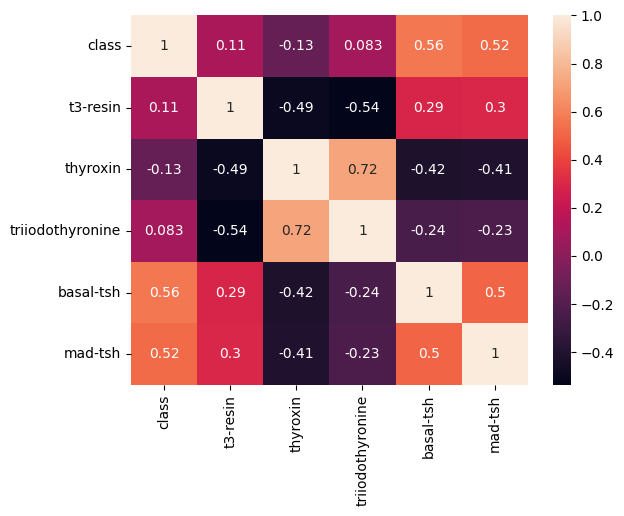

In [37]:
corr_heat_map = sns.heatmap(corr_matrix, annot=True)

In [38]:
corr_matrix.unstack().sort_values(ascending=False)

class             class               1.000000
t3-resin          t3-resin            1.000000
basal-tsh         basal-tsh           1.000000
triiodothyronine  triiodothyronine    1.000000
thyroxin          thyroxin            1.000000
mad-tsh           mad-tsh             1.000000
triiodothyronine  thyroxin            0.718682
thyroxin          triiodothyronine    0.718682
class             basal-tsh           0.563014
basal-tsh         class               0.563014
mad-tsh           class               0.519773
class             mad-tsh             0.519773
mad-tsh           basal-tsh           0.497545
basal-tsh         mad-tsh             0.497545
mad-tsh           t3-resin            0.296327
t3-resin          mad-tsh             0.296327
                  basal-tsh           0.290368
basal-tsh         t3-resin            0.290368
t3-resin          class               0.110273
class             t3-resin            0.110273
                  triiodothyronine    0.082569
triiodothyron

The features in the dataset are ranked according to their distinctiveness in classification. Features with high correlation values are more discriminative in classification.

In [39]:
correlations = df.corr()['class'].drop('class').abs().sort_values(ascending=False)
correlations

basal-tsh           0.563014
mad-tsh             0.519773
thyroxin            0.129140
t3-resin            0.110273
triiodothyronine    0.082569
Name: class, dtype: float64

### Outlier Analysis with Boxplot

For outlier analysis, boxplots are drawn for all attributes.

<Axes: xlabel='mad-tsh'>

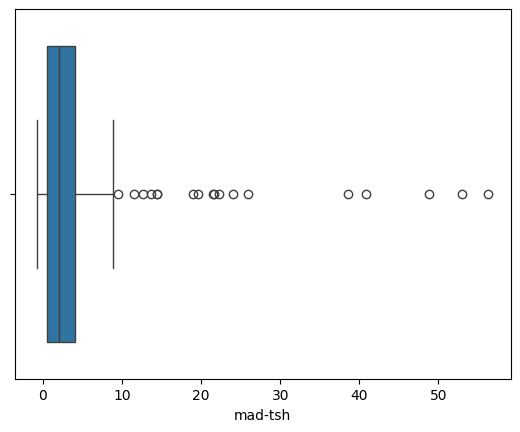

In [40]:
sns.boxplot(x = df['mad-tsh'])

<Axes: xlabel='basal-tsh'>

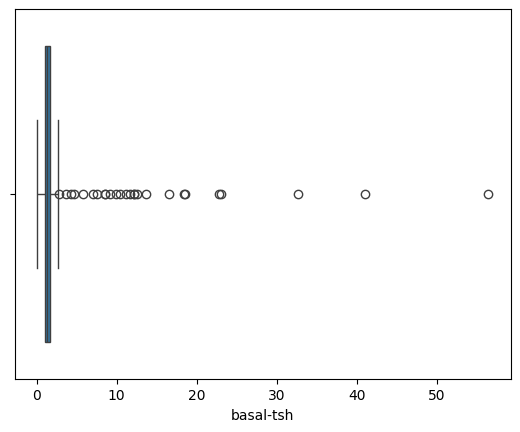

In [41]:
sns.boxplot(x = df['basal-tsh'])

<Axes: xlabel='triiodothyronine'>

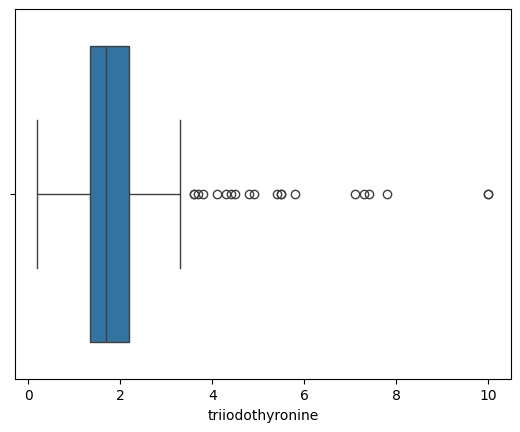

In [42]:
sns.boxplot(x = df['triiodothyronine'])

<Axes: xlabel='thyroxin'>

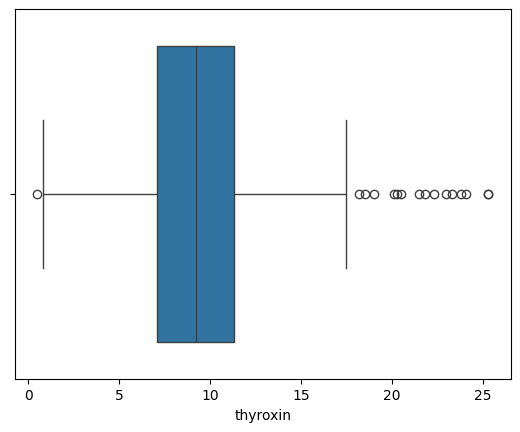

In [43]:
sns.boxplot(x = df['thyroxin'])

<Axes: xlabel='t3-resin'>

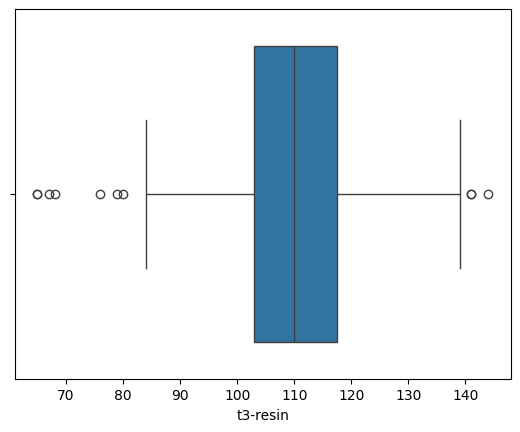

In [44]:
sns.boxplot(x = df['t3-resin'])

<Axes: >

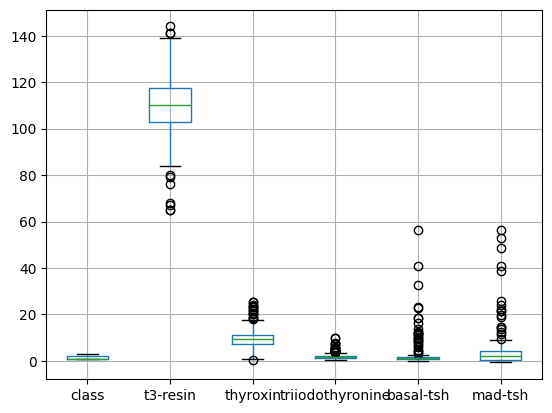

In [45]:
df.boxplot()

- **`class`**: This feature shows a compact distribution with a few outliers near the lower end, suggesting that most values are concentrated within a small range, but some deviations exist at lower values.
  
- **`t3-resin`**: The `t3-resin` feature has a tight central distribution with several outliers on both ends. The presence of these outliers suggests some variability that deviates from the main distribution.

- **`thyroxin`**: The `thyroxin` values are distributed within a relatively narrow range, with a concentration in the center and a few extreme outliers. These outliers indicate rare but significantly different values.

- **`triiodothyronine`**: Similar to `thyroxin`, the `triiodothyronine` feature has a compact distribution with some outliers that indicate variability at lower and higher values.

- **`basal-tsh`**: The distribution of `basal-tsh` is wider compared to other features, with several outliers present on both ends. This suggests greater variability in the `basal-tsh` values, where extreme values occur more frequently.

- **`mad-tsh`**: The `mad-tsh` feature also has a wider range of values with many outliers, especially on the higher end. This indicates that `mad-tsh` has notable variability, with some values significantly deviating from the central range.

The IQR coefficient is 1.5 by default. Let's review the outliers by making it 2.


<Axes: >

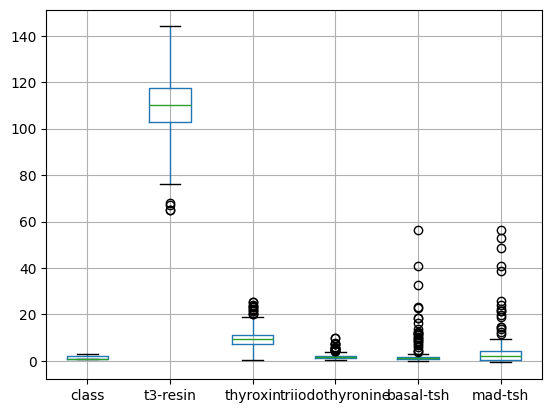

In [46]:
df.boxplot(whis=2)

When we increase the IQR coefficient from 1.5 to 2, we have fewer outlier values because we increase the extreme boundary values.

## 2- PCA
**Steps** : 
- The covariance matrix of the features in the dataset is calculated.
- Eigenvalues and eigenvectors are obtained.
- Components with the 3 highest eigenvalues are selected.
- The data is transformed according to these components and made 3D.
- A 3D graph is created by showing the class information with colors.

In [47]:
df.cov()

,class,t3-resin,thyroxin,triiodothyronine,basal-tsh,mad-tsh
class,0.528146,1.053467,-0.440850,0.085177,2.503271,3.048544
t3-resin,1.053467,172.802782,-30.513997,-10.019765,23.352617,31.437472
thyroxin,-0.440850,-30.513997,22.065212,4.792055,-12.151963,-15.541818
triiodothyronine,0.085177,-10.019765,4.792055,2.014942,-2.098523,-2.605000
basal-tsh,2.503271,23.352617,-12.151963,-2.098523,37.430299,24.566617
mad-tsh,3.048544,31.437472,-15.541818,-2.605000,24.566617,65.133270


For feature selection, class information is extracted from the data.

In [48]:
classes = df['class']
df_features = df.drop(columns=['class'])
df_features

,t3-resin,thyroxin,triiodothyronine,basal-tsh,mad-tsh
0,107,10.1,2.2,0.9,2.7
1,113,9.9,3.1,2.0,5.9
2,127,12.9,2.4,1.4,0.6
3,109,5.3,1.6,1.4,1.5
4,105,7.3,1.5,1.5,-0.1
...,...,...,...,...,...
210,118,6.5,1.3,1.7,11.5
211,139,4.2,0.7,4.3,6.3
212,103,5.1,1.4,1.2,5.0
213,97,4.7,1.1,2.1,12.6


PCA is a method sensitive to the scales of variables.  If the data is not standardized, some features may have larger variance, resulting in different results.

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

Eigenvalues and eigenvectors are calculated.

In [50]:
cov_matrix = np.cov(X_scaled.T)
cov_matrix

array([[ 1.0046729 , -0.49647155, -0.53948037,  0.29172472,  0.29771142],
       [-0.49647155,  1.0046729 ,  0.72203991, -0.42482045, -0.41188029],
       [-0.53948037,  0.72203991,  1.0046729 , -0.24277034, -0.2284545 ],
       [ 0.29172472, -0.42482045, -0.24277034,  1.0046729 ,  0.49986986],
       [ 0.29771142, -0.41188029, -0.2284545 ,  0.49986986,  1.0046729 ]])

In [51]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [2.69288177 1.03192984 0.24244724 0.55374173 0.5023639 ]
Eigenvectors:
 [[-0.44215446  0.28471825 -0.11951846  0.82353965 -0.17587705]
 [ 0.52586996 -0.17989462  0.7069806   0.42588947 -0.09947516]
 [ 0.47478699 -0.47635295 -0.66947414  0.30708978 -0.07187092]
 [-0.39142808 -0.56720574  0.13508051 -0.14337645 -0.69732213]
 [-0.38642152 -0.58132517  0.13946833  0.15981137  0.68392132]]


We select the components with the highest eigenvalues by sorting the eigenvalues from largest to smallest. The eigenvectors are ordered in the same way according to the selected eigenvalues.

In [52]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print("Sorted Eigenvalues:\n", sorted_eigenvalues)
print("Sorted Eigenvectors:\n", sorted_eigenvectors)


Sorted Eigenvalues:
 [2.69288177 1.03192984 0.55374173 0.5023639  0.24244724]
Sorted Eigenvectors:
 [[-0.44215446  0.28471825  0.82353965 -0.17587705 -0.11951846]
 [ 0.52586996 -0.17989462  0.42588947 -0.09947516  0.7069806 ]
 [ 0.47478699 -0.47635295  0.30708978 -0.07187092 -0.66947414]
 [-0.39142808 -0.56720574 -0.14337645 -0.69732213  0.13508051]
 [-0.38642152 -0.58132517  0.15981137  0.68392132  0.13946833]]


After ranking the eigenvalues, we can select the number of components that explain a given variance ratio. To do this, we first calculate the cumulative variance ratio and then determine the number of components that meet a certain threshold. However, since we are asked for 3 attributes, we directly select the first three.

In [53]:
cumulative_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)
cumulative_variance_ratio

array([0.53607135, 0.74149738, 0.85173062, 0.95173608, 1.        ])

In [54]:
num_components = 3 
selected_eigenvectors = sorted_eigenvectors[:, :num_components]

We reconstruct the dataset with the selected components. To do this, we transform the data into the new component space using the eigenvectors of the selected components.

In [55]:
selected_eigenvectors = sorted_eigenvectors[:, :num_components]
selected_eigenvectors

array([[-0.44215446,  0.28471825,  0.82353965],
       [ 0.52586996, -0.17989462,  0.42588947],
       [ 0.47478699, -0.47635295,  0.30708978],
       [-0.39142808, -0.56720574, -0.14337645],
       [-0.38642152, -0.58132517,  0.15981137]])

In [56]:
reduced_data = np.dot(X_scaled, selected_eigenvectors)
reduced_data

array([[ 3.69770845e-01,  1.74168423e-01, -8.69009383e-02],
       [ 2.22659801e-01, -3.23880245e-01,  5.04524823e-01],
       [ 1.45452763e-01,  5.38760387e-01,  1.41338789e+00],
       [-4.11900263e-01,  6.43835758e-01, -5.63191488e-01],
       [-1.57723537e-02,  6.20086468e-01, -6.88405175e-01],
       [-2.83603728e-01, -3.89874210e-02, -5.24081394e-01],
       [ 5.62467996e-02,  3.64551207e-01, -1.78032632e-02],
       [-4.07243367e-03, -5.81236957e-03,  4.23304094e-01],
       [ 4.16039138e-01,  3.18509884e-01, -2.80993178e-01],
       [ 3.07202250e-01,  4.03969374e-01, -5.39455564e-02],
       [-5.76320497e-01,  7.44112091e-01, -9.44960090e-01],
       [ 4.08012698e-01,  1.16277988e-01,  2.44128419e-01],
       [ 5.45820399e-02,  1.18329639e-01,  5.32304797e-01],
       [-2.69765440e-01,  2.50742418e-01, -9.94010686e-02],
       [-3.57983479e-01,  7.53085326e-01,  6.78635245e-01],
       [ 2.20387587e-02,  2.32916548e-01, -1.24322333e-01],
       [-1.12124202e-01,  6.79309615e-01

We visualize each class in 3D space with a different color.

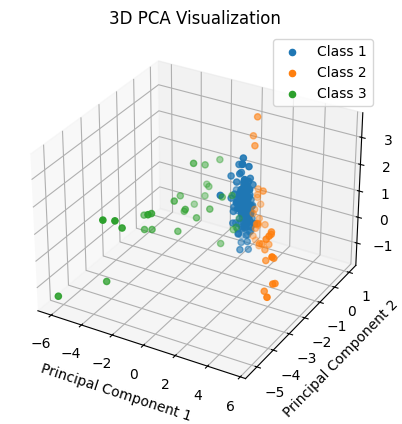

In [57]:
classes = df['class']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#for different colors
for class_value in np.unique(classes):
    indices = np.where(classes == class_value)
    ax.scatter(reduced_data[indices, 0], reduced_data[indices, 1], reduced_data[indices, 2], label=f'Class {class_value}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.title('3D PCA Visualization')
plt.show()

Let's use the PCA function available in Scikit-learn.

In [58]:
df = pd.read_csv('new-thyroid.data', names=["class", "t3-resin", "thyroxin", "triiodothyronine", "basal-tsh", "mad-tsh"])

X = df.drop(columns=['class'])
y = df['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X_scaled)

print("Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance:", sum(pca.explained_variance_ratio_))

Variance Ratio: [0.53607135 0.20542603 0.11023324]
Total Variance: 0.8517306179564207


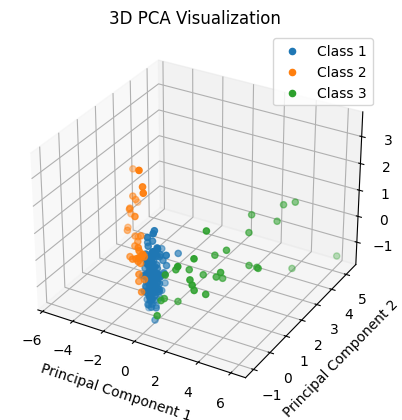

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for class_value in np.unique(y):
    indices = np.where(y == class_value)
    ax.scatter(X_reduced[indices, 0], X_reduced[indices, 1], X_reduced[indices, 2], label=f'Class {class_value}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.title('3D PCA Visualization')
plt.show()


It can be safely said that the two graphs are similar. Only reflections or sign differences on the axes can create a visual effect; this is related to the general nature of PCA and does not affect the underlying structure of the data.